# Project - Solar Production 
## Exploratory Data Analysis


In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
data = pd.read_csv("solarpowergeneration.csv")# reading csv file
data.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [3]:
data

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [5]:
data.tail(10)

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
2910,0.523627,61,27,15.8,3,10.0,84,17.0,29.85,895
2911,0.753512,61,27,15.8,4,10.0,90,13.0,29.87,0
2912,0.857875,63,27,13.9,4,10.0,93,11.0,29.86,0
2913,0.627401,63,27,13.9,4,10.0,90,11.0,29.86,0
2914,0.396927,63,27,13.9,4,10.0,87,9.0,29.90,464
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677
2919,0.755442,63,27,13.9,1,10.0,81,11.0,29.90,0


In [6]:
#Data Structure
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(2920, 10)


In [7]:
data.dtypes

distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object

In [8]:
data.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [9]:
data.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [10]:
data['average-wind-speed-(period)'].fillna(value=30.017760, inplace=True)

In [11]:
print('Updated Dataframe:')
print(data)

Updated Dataframe:
      distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0       

In [12]:
data.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

<Axes: >

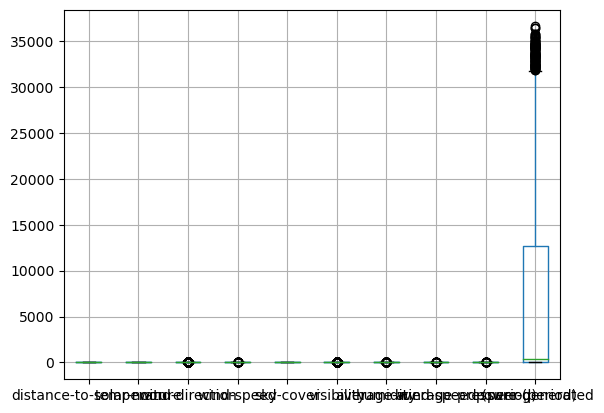

In [13]:
data.boxplot()

In [14]:
plt.boxplot(data['power-generated'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb6e8d8950>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb6e8ab3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb6e8b4850>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb6e8db790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb6880e050>],
 'means': []}

In [15]:
#Extracting outliers
box=plt.boxplot(data['power-generated'].dropna())

# Scatter plot and Correlation analysis

In [16]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
pd.plotting.scatter_matrix(data)
sns.pairplot(data)

C:\Users\abhis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [17]:
#Correlation
data.corr()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.145207,-0.118010,-0.145073,-0.015184,0.065807,0.368964,-0.214917,0.082505,-0.746681
temperature,-0.145207,1.000000,0.342146,0.096267,-0.230672,0.194110,-0.221463,0.054274,-0.435723,0.132193
wind-direction,-0.118010,0.342146,1.000000,0.341529,-0.137140,0.203445,-0.095917,0.227656,-0.272405,0.146788
wind-speed,-0.145073,0.096267,0.341529,1.000000,0.107793,0.184778,0.004901,0.671086,-0.379752,0.142641
sky-cover,-0.015184,-0.230672,-0.137140,0.107793,1.000000,-0.223523,0.394576,0.044252,-0.091512,-0.187236
visibility,0.065807,0.194110,0.203445,0.184778,-0.223523,1.000000,-0.291320,0.139276,-0.105345,0.076536
humidity,0.368964,-0.221463,-0.095917,0.004901,0.394576,-0.291320,1.000000,-0.216281,0.018489,-0.522545
average-wind-speed-(period),-0.214917,0.054274,0.227656,0.671086,0.044252,0.139276,-0.216281,1.000000,-0.292091,0.277177
average-pressure-(period),0.082505,-0.435723,-0.272405,-0.379752,-0.091512,-0.105345,0.018489,-0.292091,1.000000,-0.036771
power-generated,-0.746681,0.132193,0.146788,0.142641,-0.187236,0.076536,-0.522545,0.277177,-0.036771,1.000000


## Preparing a model 

In [18]:
#check for missing values
data.isna().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [20]:
#rename the variable name of column 1
data_cleaned = data.rename({'distance-to-solar-noon': 'distance'}, axis=1)

In [21]:
#rename the variable name of column 3
data_cleaned1 = data_cleaned.rename({'wind-direction': 'winddirection'}, axis=1)

In [22]:
#rename the variable name of column 4
data_cleaned2 = data_cleaned1.rename({'wind-speed': 'windspeed'}, axis=1)

In [23]:
#rename the variable name of column 5
data_cleaned3 = data_cleaned2.rename({'sky-cover': 'skycover'}, axis=1)

In [24]:
#rename the variable name of column 8
data_cleaned4 = data_cleaned3.rename({'average-wind-speed-(period)': 'avgwindspeed'}, axis=1)

In [25]:
#rename the variable name of column 9
data_cleaned5 = data_cleaned4.rename({'average-pressure-(period)': 'avgpressure'}, axis=1)

In [26]:
#rename the variable name of column 10
data_cleaned6 = data_cleaned5.rename({'power-generated': 'power'}, axis=1)

In [27]:
data_cleaned6.head()

,distance,temperature,winddirection,windspeed,skycover,visibility,humidity,avgwindspeed,avgpressure,power
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [28]:
#Build model
import statsmodels.formula.api as smf 

In [29]:
model = smf.ols('power~distance+temperature+winddirection+windspeed+skycover+visibility+humidity+avgwindspeed+avgpressure',data=data_cleaned6).fit()

In [30]:
#Coefficients
model.params

Intercept       -33844.855004
distance        -22683.980265
temperature        -66.360876
winddirection       45.522419
windspeed          -10.608459
skycover          -834.520919
visibility         180.637636
humidity          -146.679587
avgwindspeed       140.424133
avgpressure       2144.880325
dtype: float64

In [31]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -1.124064
distance        -52.214515
temperature      -3.257018
winddirection     2.433496
windspeed        -0.303394
skycover         -8.954631
visibility        1.975869
humidity        -15.025817
avgwindspeed      6.302724
avgpressure       2.191170
dtype: float64 
 Intercept        2.610787e-01
distance         0.000000e+00
temperature      1.138822e-03
winddirection    1.501363e-02
windspeed        7.616114e-01
skycover         5.943489e-19
visibility       4.826390e-02
humidity         3.325331e-49
avgwindspeed     3.367636e-10
avgpressure      2.851851e-02
dtype: float64


In [32]:
#R squared values MLR
(model.rsquared,model.rsquared_adj)

(0.6491089073740597, 0.6480236771906804)

# Calculating VIF 

In [33]:
rsq_distance = smf.ols('distance~temperature+winddirection+windspeed+skycover+visibility+humidity+avgwindspeed+avgpressure+power',data=data_cleaned6).fit().rsquared
rsq_distance

0.6050601709802015

In [34]:
vif_distance = 1/(1-rsq_distance)
vif_distance

2.5320312779845495

In [35]:
rsq_distance = smf.ols('distance~temperature+winddirection+windspeed+skycover+visibility+humidity+avgwindspeed+avgpressure+power',data=data_cleaned6).fit().rsquared
vif_distance = 1/(1-rsq_distance)


rsq_temperature = smf.ols('temperature~distance+winddirection+windspeed+skycover+visibility+humidity+avgwindspeed+avgpressure+power',data=data_cleaned6).fit().rsquared
vif_temperature = 1/(1-rsq_temperature)

rsq_winddirection = smf.ols('winddirection~distance+temperature+windspeed+skycover+visibility+humidity+avgwindspeed+avgpressure+power',data=data_cleaned6).fit().rsquared
vif_winddirection = 1/(1-rsq_winddirection)

rsq_windspeed = smf.ols('windspeed~distance+temperature+winddirection+skycover+visibility+humidity+avgwindspeed+avgpressure+power',data=data_cleaned6).fit().rsquared
vif_windspeed = 1/(1-rsq_windspeed)

rsq_skycover = smf.ols('skycover~distance+temperature+winddirection+windspeed+visibility+humidity+avgwindspeed+avgpressure+power',data=data_cleaned6).fit().rsquared
vif_skycover = 1/(1-rsq_skycover)

rsq_visibility = smf.ols('visibility~distance+temperature+winddirection+windspeed+skycover+humidity+avgwindspeed+avgpressure+power',data=data_cleaned6).fit().rsquared
vif_visibility = 1/(1-rsq_visibility)

rsq_humidity = smf.ols('humidity~distance+temperature+winddirection+windspeed+skycover+visibility+avgwindspeed+avgpressure+power',data=data_cleaned6).fit().rsquared
vif_humidity = 1/(1-rsq_humidity)

rsq_avgwindspeed = smf.ols('avgwindspeed~distance+temperature+winddirection+windspeed+skycover+visibility+humidity+avgpressure+power',data=data_cleaned6).fit().rsquared
vif_avgwindspeed = 1/(1-rsq_avgwindspeed)

rsq_avgpressure = smf.ols('avgpressure~distance+temperature+winddirection+windspeed+skycover+visibility+humidity+avgwindspeed+power',data=data_cleaned6).fit().rsquared
vif_avgpressure = 1/(1-rsq_avgpressure)

rsq_power = smf.ols('power~distance+temperature+winddirection+windspeed+skycover+visibility+humidity+avgwindspeed+avgpressure',data=data_cleaned6).fit().rsquared
vif_power = 1/(1-rsq_power)



# Storing vif values in a data frame
d1 = {'Variables':['power', 'distance', 'temperature', 'winddirection', 'windspeed', 'skycover', 'visibility', 'humidity', 'avgwindspeed', 'avgpressure'],'VIF':[vif_distance,vif_temperature,vif_winddirection,vif_windspeed,vif_skycover,vif_visibility,vif_humidity,vif_avgwindspeed,vif_avgpressure,vif_power]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,power,2.532031
1,distance,1.520672
2,temperature,1.307632
3,winddirection,2.231907
4,windspeed,1.387543
5,skycover,1.249937
6,visibility,1.820369
7,humidity,2.073700
8,avgwindspeed,1.509346
9,avgpressure,2.849887


### it looks that avgpressure & winddirection has some multicolinearity so lets see which one will increase the significance of the model

# Subset Selection

## AIC

In [36]:
#Build model with winddrection and removed avgpressure
import statsmodels.formula.api as smf 
model1 = smf.ols('power~distance+temperature+winddirection+windspeed+skycover+visibility+humidity+avgwindspeed',data=data_cleaned6).fit()
f'AIC:{model1.aic}, rsq_direction:{rsq_winddirection}'

'AIC:59218.360443653124, rsq_direction:0.23525902416641153'

In [37]:
#Build model with avgpressure and removed winddrection 
import statsmodels.formula.api as smf 
model2 = smf.ols('power~distance+temperature+windspeed+skycover+visibility+humidity+avgwindspeed+avgpressure',data=data_cleaned6).fit()
f'AIC:{model2.aic}, rsq_avgpressure:{rsq_avgpressure}'

'AIC:59219.48290163828, rsq_avgpressure:0.3374613649130125'

In [38]:
#Build model removed humidity 
import statsmodels.formula.api as smf 
model3 = smf.ols('power~distance+temperature+windspeed+skycover+visibility+winddirection+avgwindspeed+avgpressure',data=data_cleaned6).fit()
f'AIC:{model3.aic}, rsq_humidity:{rsq_humidity}'

'AIC:59431.738794974575, rsq_humidity:0.45066091978727074'

## Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

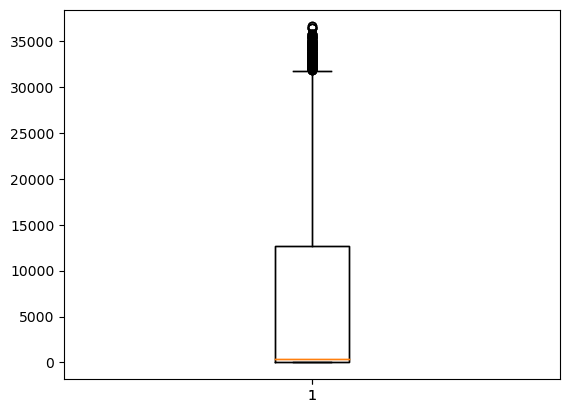

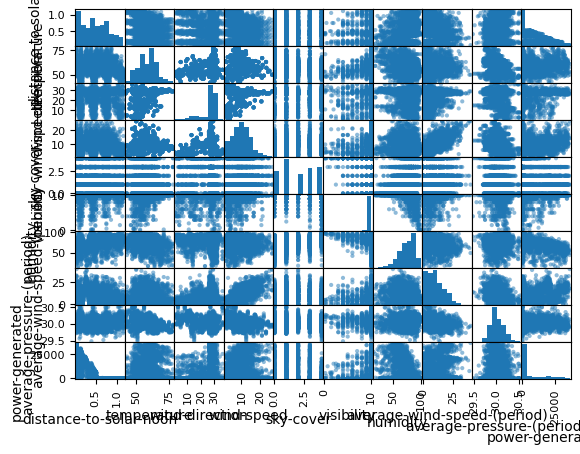

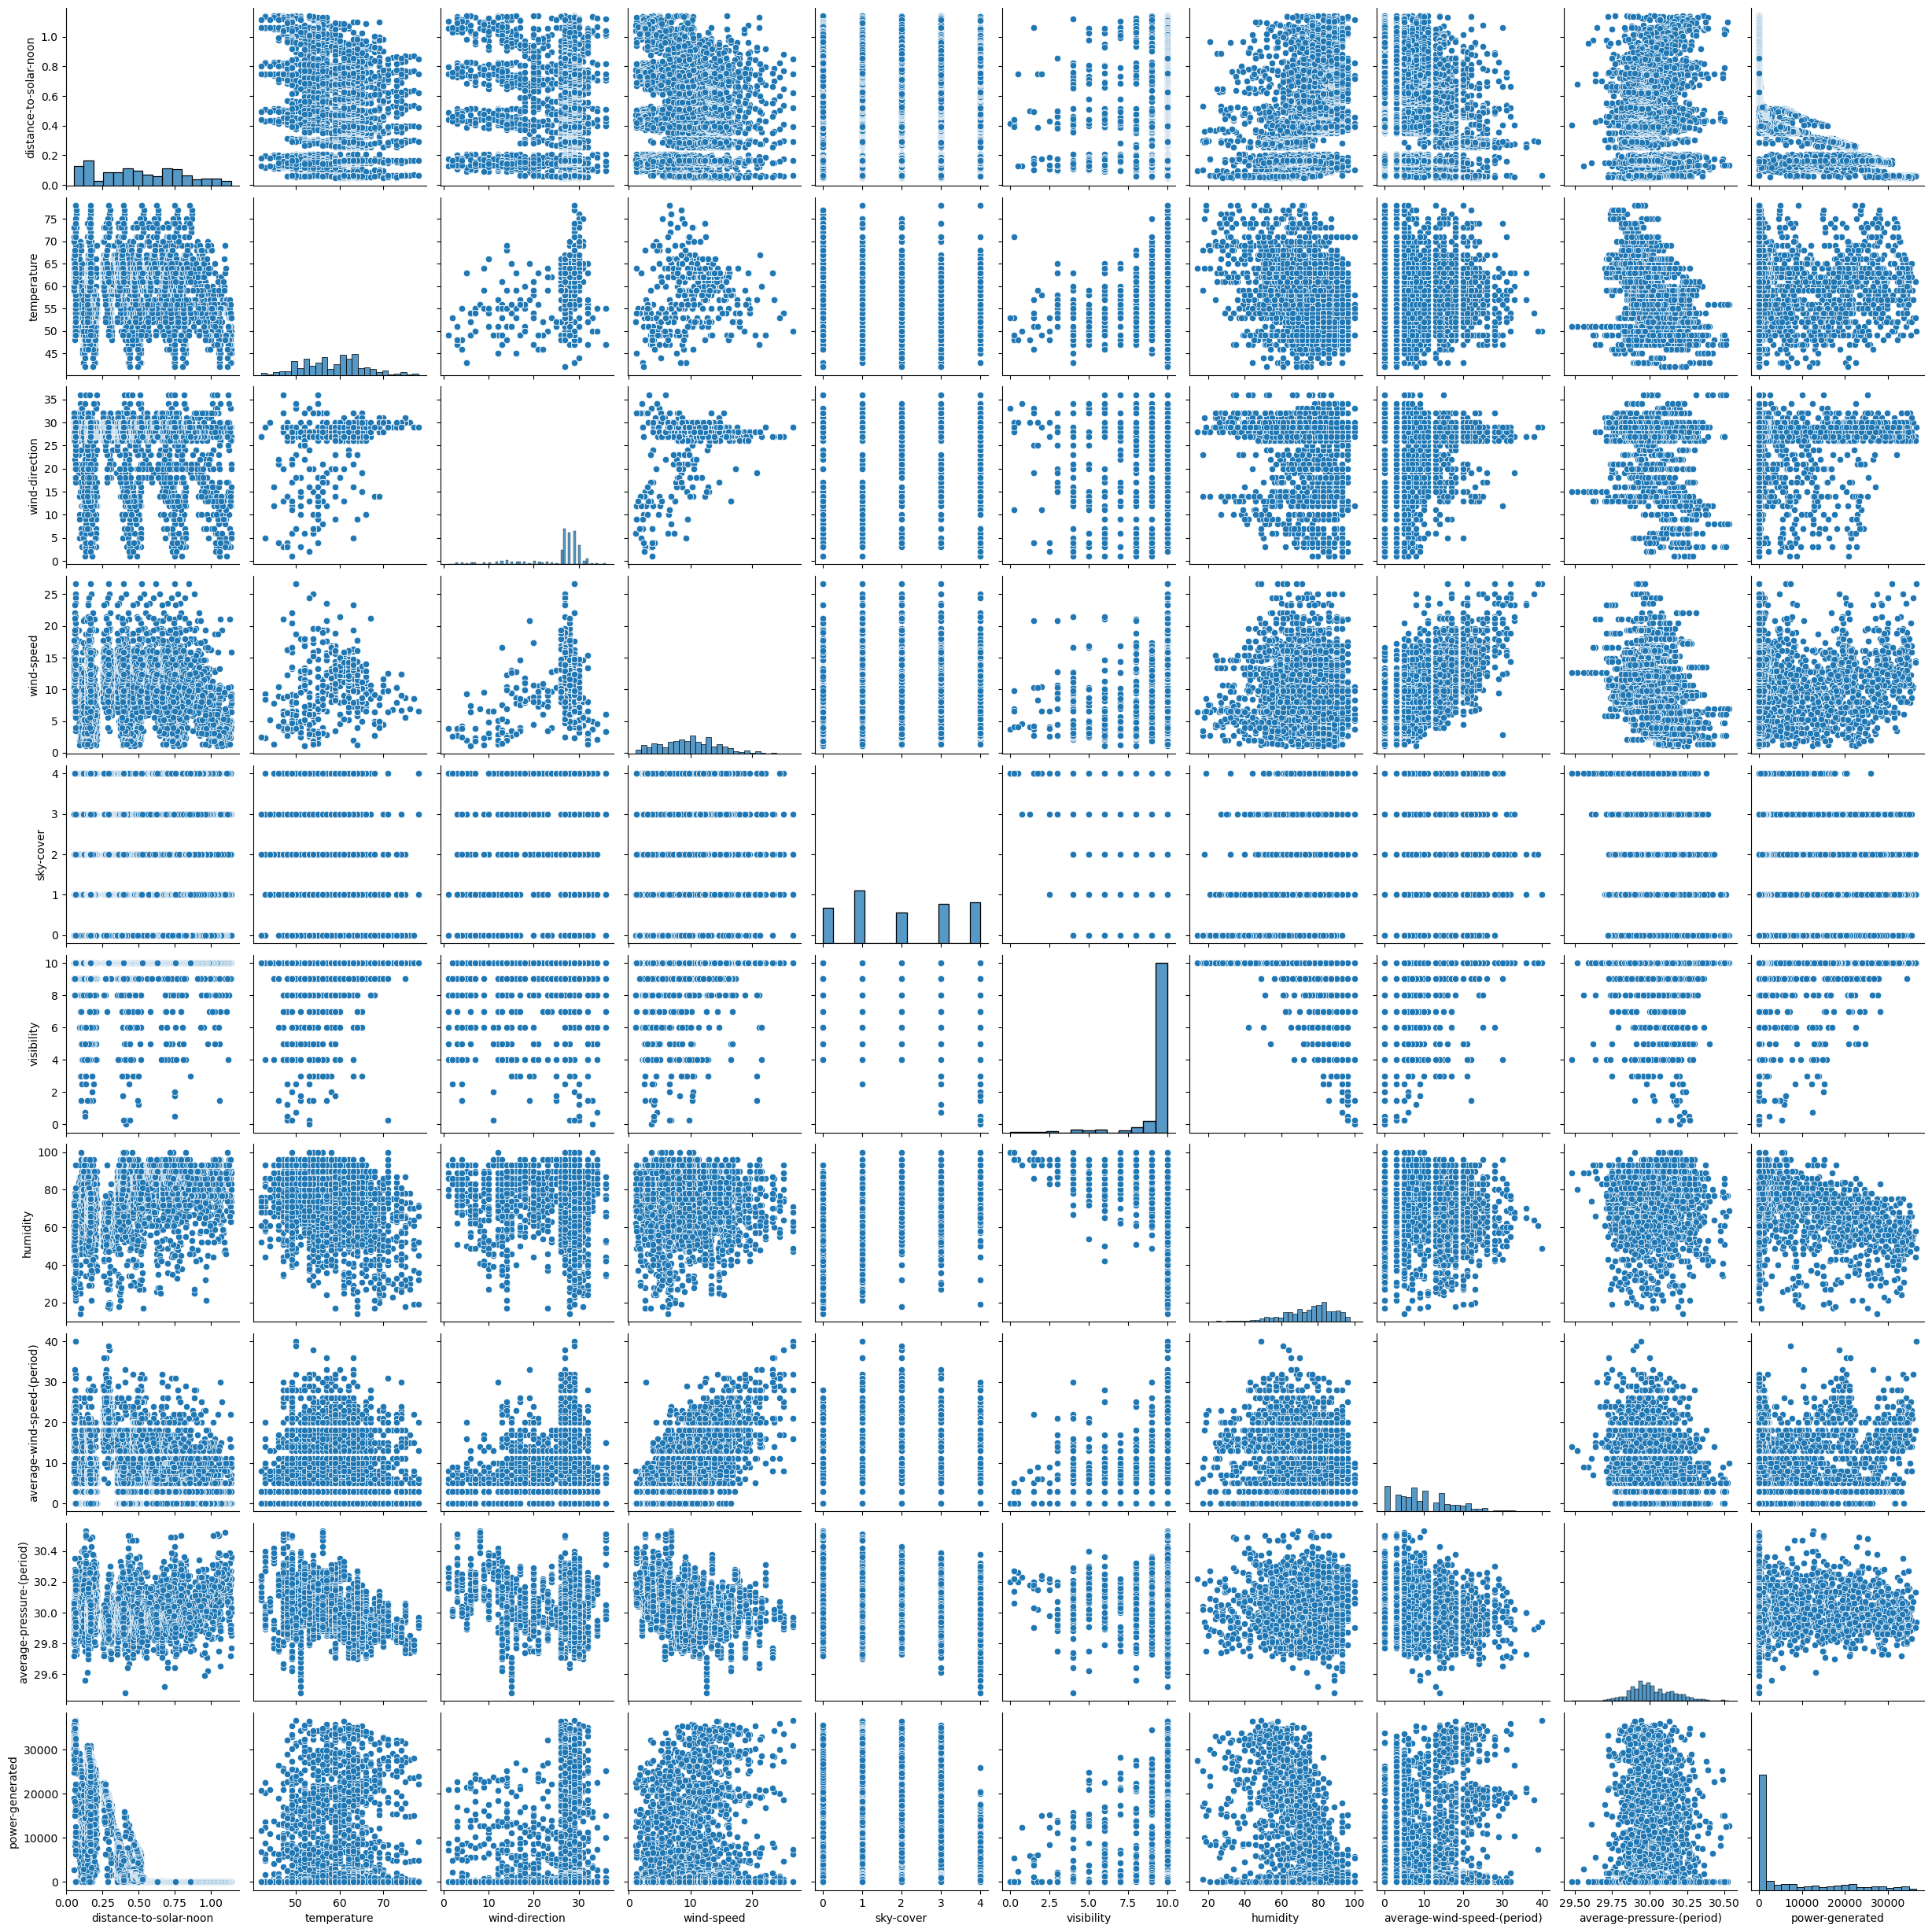

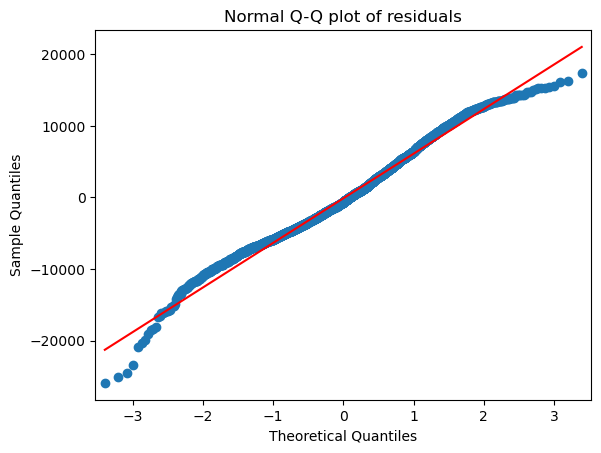

In [39]:
import statsmodels.api as sm

model = smf.ols('power~distance+temperature+winddirection+windspeed+skycover+visibility+humidity+avgwindspeed+avgpressure',data=data_cleaned6).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [40]:
list(np.where(model.resid>10)) 

[array([   0,    3,    4, ..., 2913, 2916, 2917], dtype=int64)]

## Random Forest Regressor 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [42]:
x=data_cleaned6.drop(['power'], axis=1)
y=data_cleaned6[['power']]
x.head()

,distance,temperature,winddirection,windspeed,skycover,visibility,humidity,avgwindspeed,avgpressure
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89


In [43]:
num_trees = 70
max_features = 5

In [44]:
y.tail()

,power
2915,6995
2916,29490
2917,17257
2918,677
2919,0


In [45]:
kfold = KFold(n_splits=7, random_state=34, shuffle=True)
model = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)

In [46]:
results = cross_val_score(model, x, y, cv=kfold)
print("The accuracy is ",results.mean())

The accuracy is  0.912485114786037


In [50]:
reg=RandomForestRegressor()
reg.fit(x_train,y_train)
from sklearn.metrics import r2_score
y_pred_train =reg.predict(x_train)
y_pred_train
r2_score(y_train,y_pred_train)

0.9867735390935759

In [51]:

y_pred_test =reg.predict(x_test)
y_pred_train
r2_score(y_test,y_pred_test)

0.9155185177581671

## RIDGE Regression 

In [48]:
X = data.iloc[:,0:9]
Y = data.iloc[:,9]

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=10)
(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((2190, 9), (2190,), (730, 9), (730,))

In [52]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
reg_coefficient = pd.DataFrame() 
reg_coefficient["Columns"] = x_train.columns 
reg_coefficient['Normal_Reg_Coeff'] = pd.Series(lreg.coef_) 
reg_coefficient

Mean squared Error on test set :  37589014.28391893


,Columns,Normal_Reg_Coeff
0,distance-to-solar-noon,-22854.313892
1,temperature,-62.823205
2,wind-direction,49.418494
3,wind-speed,-13.007478
4,sky-cover,-908.142160
5,visibility,210.354684
6,humidity,-140.458561
7,average-wind-speed-(period),146.880964
8,average-pressure-(period),2887.510321


In [53]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 3) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
# ridge_coefficient = pd.DataFrame() 
# ridge_coefficient["Columns"]= x_train.columns 
reg_coefficient['Ridge_Reg_Coeff'] = pd.Series(ridgeR.coef_) 
reg_coefficient

37536778.62198349


,Columns,Normal_Reg_Coeff,Ridge_Reg_Coeff
0,distance-to-solar-noon,-22854.313892,-22408.620005
1,temperature,-62.823205,-63.640091
2,wind-direction,49.418494,50.857658
3,wind-speed,-13.007478,-11.901401
4,sky-cover,-908.142160,-895.693677
5,visibility,210.354684,186.767984
6,humidity,-140.458561,-144.596483
7,average-wind-speed-(period),146.880964,147.057013
8,average-pressure-(period),2887.510321,2621.725801


In [54]:
y_pred_train = ridgeR.predict(x_train)
y_pred_test = ridgeR.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R-squared on the training set:", r2_train)
print("R-squared on the testing set:", r2_test)

R-squared on the training set: 0.6481306310860198
R-squared on the testing set: 0.650386274958213


lasso Regression

In [55]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print(mean_squared_error)
print("Mean squared error on test set", mean_squared_error) 
# lasso_coeff = pd.DataFrame() 
# lasso_coeff["Columns"] = x_train.columns 
reg_coefficient['Lasso_reg_Coeff'] = pd.Series(lasso.coef_) 
reg_coefficient

37580620.21501399
Mean squared error on test set 37580620.21501399


,Columns,Normal_Reg_Coeff,Ridge_Reg_Coeff,Lasso_reg_Coeff
0,distance-to-solar-noon,-22854.313892,-22408.620005,-22838.712303
1,temperature,-62.823205,-63.640091,-63.388632
2,wind-direction,49.418494,50.857658,49.427368
3,wind-speed,-13.007478,-11.901401,-13.298582
4,sky-cover,-908.142160,-895.693677,-908.119285
5,visibility,210.354684,186.767984,208.784880
6,humidity,-140.458561,-144.596483,-140.661899
7,average-wind-speed-(period),146.880964,147.057013,146.667099
8,average-pressure-(period),2887.510321,2621.725801,2814.210650


In [56]:
y_pred_train = lasso.predict(x_train)
y_pred_test = lasso.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R-squared on the training set:", r2_train)
print("R-squared on the testing set:", r2_test)

R-squared on the training set: 0.6482682195428513
R-squared on the testing set: 0.6499779388352465


 GradientBoostingRegressor

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the model
gbr = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [58]:
y_pred_train = gbr.predict(x_train)
y_pred_test = gbr.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("R-squared on the training set:", r2_train)
print("R-squared on the testing set:", r2_test)
print("RMSE on the training set:", rmse_train)
print("RMSE on the testing set:", rmse_test)

R-squared on the training set: 0.9433773438180759
R-squared on the testing set: 0.9187176490198034
RMSE on the training set: 2448.4003346357636
RMSE on the testing set: 2954.1489635868766


In [59]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 120, 140],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
gbr = GradientBoostingRegressor(random_state=42)

# Set up the grid search
grid = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search
grid.fit(x_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 120, 140]},
             verbose=2)

In [60]:
# Best parameters and estimator
print("Best Parameters:", grid.best_params_)
best_gbm_model = grid.best_estimator_

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 140}


In [61]:
# Evaluate the best model
import numpy as np

y_pred_best = best_gbm_model.predict(x_test)
print("Tuned R^2 Score train:", r2_score(y_train, y_pred_train))
print("Tuned R^2 Score test:", r2_score(y_test, y_pred_best))
print("Tuned RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred_best)))

Tuned R^2 Score train: 0.9433773438180759
Tuned R^2 Score test: 0.9208084950427452
Tuned RMSE test: 2915.9062775418893


In [62]:
import pickle 
pickle_out = open("gbr.pkl", mode = "wb") 
pickle.dump(gbr, pickle_out) 
pickle_out.close() #

In [63]:
import pickle 
pickle_out = open("lasso.pkl", mode = "wb") 
pickle.dump(lasso, pickle_out) 
pickle_out.close()